# Monte Carlo Ising Model

In [1]:
#1
import numpy as np

def calculate_energy(lattice, J=1):
    N = lattice.shape[0]
    energy = 0
    for i in range(N):
        for j in range(N):
            spin = lattice[i, j]
            # Periodic boundary conditions
            neighbors = lattice[(i+1) % N, j] + lattice[i, (j+1) % N] + lattice[(i-1) % N, j] + lattice[i, (j-1) % N]
            energy -= J * spin * neighbors
    return energy / 2  # Each pair counted twice

In [2]:
#2
def metropolis_step(lattice, beta):
    N = lattice.shape[0]
    for _ in range(N**2):
        i, j = np.random.randint(0, N, size=2)
        spin = lattice[i, j]
        neighbors = lattice[(i+1) % N, j] + lattice[i, (j+1) % N] + lattice[(i-1) % N, j] + lattice[i, (j-1) % N]
        dE = 2 * spin * neighbors
        if dE < 0 or np.random.rand() < np.exp(-dE * beta):
            lattice[i, j] *= -1

def ising_model(N=20, J=1, T=1, steps=1000000):
    lattice = np.random.choice([-1, 1], size=(N, N))
    beta = 1 / T
    energies = []
    magnetizations = []
    
    for step in range(steps):
        metropolis_step(lattice, beta)
        if step % (steps // 100) == 0:  # Record data periodically
            energy = calculate_energy(lattice, J)
            magnetization = np.sum(lattice)
            energies.append(energy)
            magnetizations.append(magnetization)
    
    return energies, magnetizations

energies, magnetizations = ising_model(N=20, J=1, T=1, steps=1000)


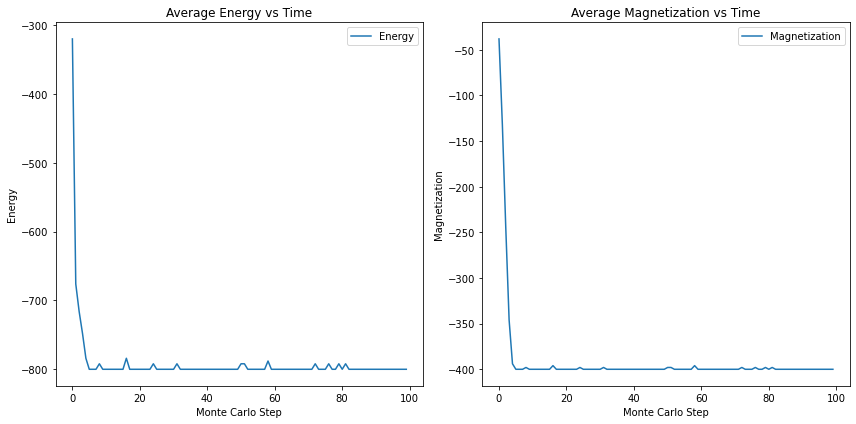

In [3]:
#3
import matplotlib.pyplot as plt

def plot_results(energies, magnetizations):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(energies, label='Energy')
    plt.xlabel('Monte Carlo Step')
    plt.ylabel('Energy')
    plt.title('Average Energy vs Time')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(magnetizations, label='Magnetization')
    plt.xlabel('Monte Carlo Step')
    plt.ylabel('Magnetization')
    plt.title('Average Magnetization vs Time')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_results(energies, magnetizations)


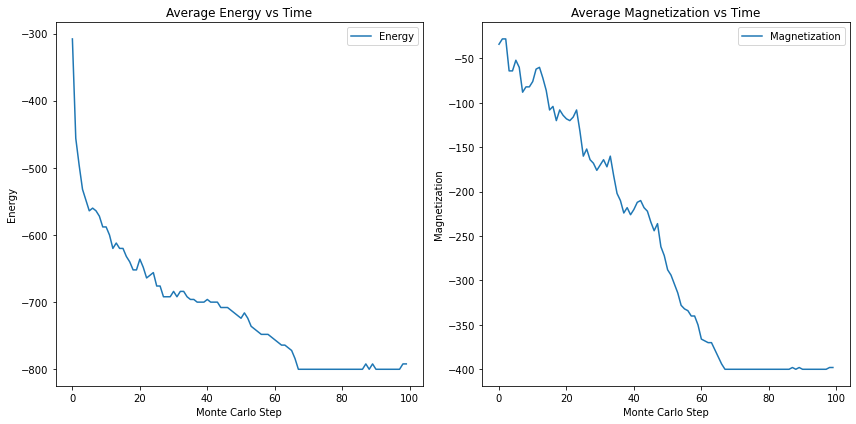

Final Magnetization with seed 42: -398


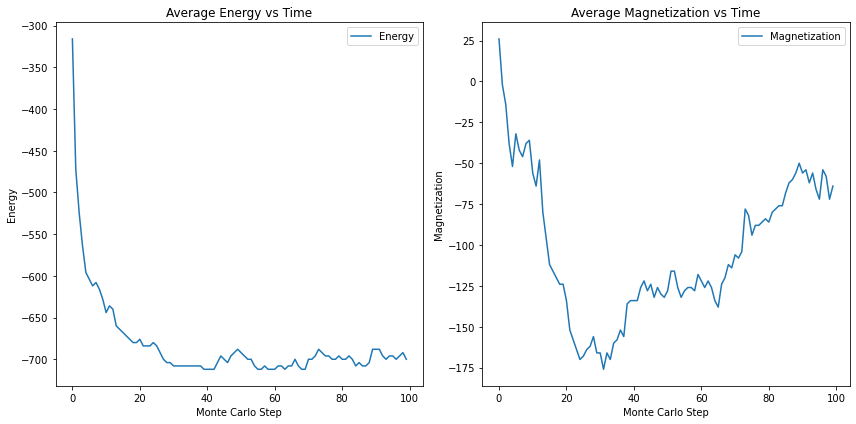

Final Magnetization with seed 43: -64


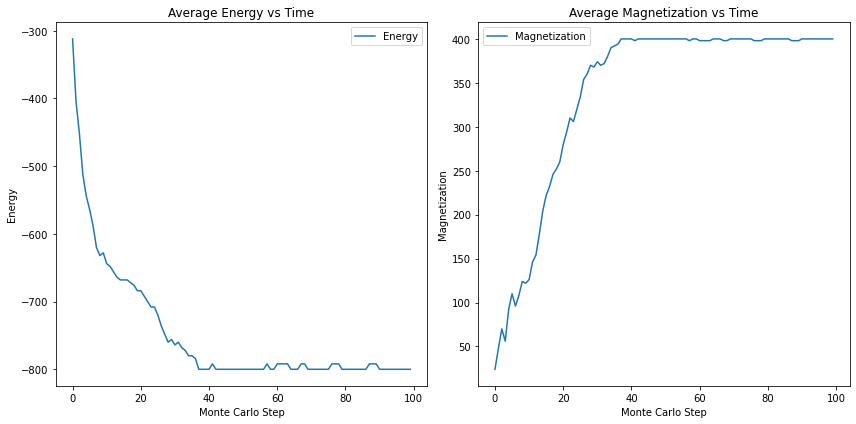

Final Magnetization with seed 44: 400


In [4]:
#4
def run_simulation(seed=None, T=1, steps=1000000):
    if seed is not None:
        np.random.seed(seed)
    energies, magnetizations = ising_model(N=20, J=1, T=T, steps=steps)
    plot_results(energies, magnetizations)
    return magnetizations[-1]  # Return final magnetization

for seed in [42, 43, 44]:
    final_magnetization = run_simulation(seed=seed, T=1, steps=100)
    print(f"Final Magnetization with seed {seed}: {final_magnetization}")
    
#The system develops spontaneous magnetization, where spins align predominantly in 
#one direction.
#The final magnetization can be positive or negative, depending on the initial 
#conditions and randomness.

#At low temperatures, thermal fluctuations are minimal, allowing spins to align and 
#lower the system's energy, resulting in spontaneous magnetization.


Running simulation at T = 1


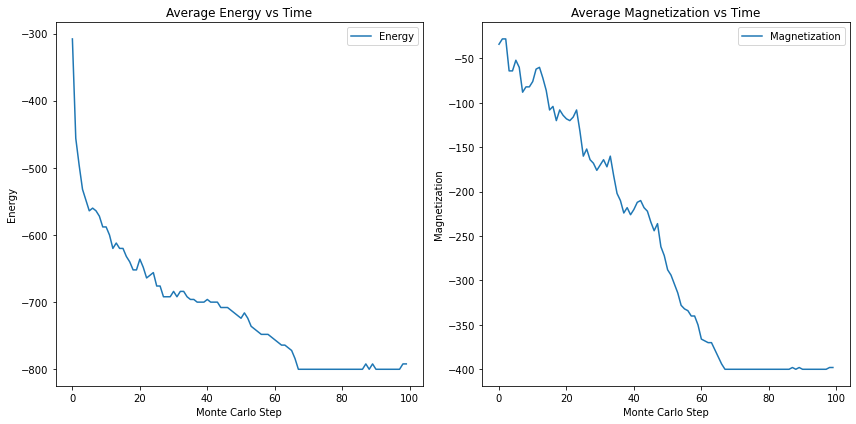

Final Magnetization at T = 1: -398
Running simulation at T = 2


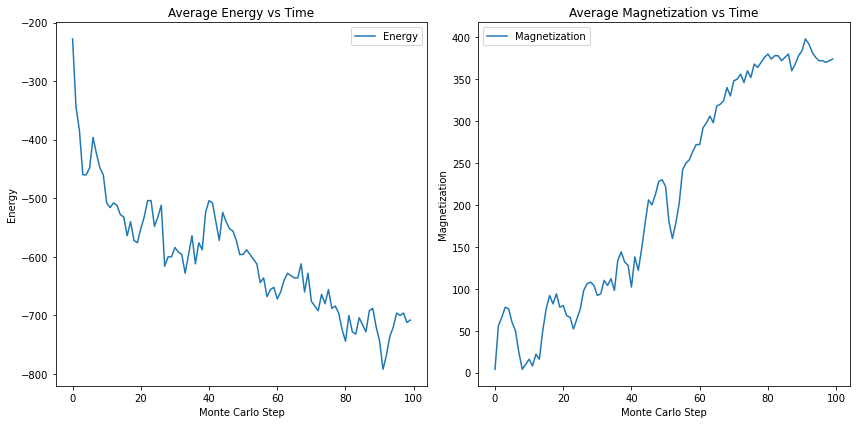

Final Magnetization at T = 2: 374
Running simulation at T = 3


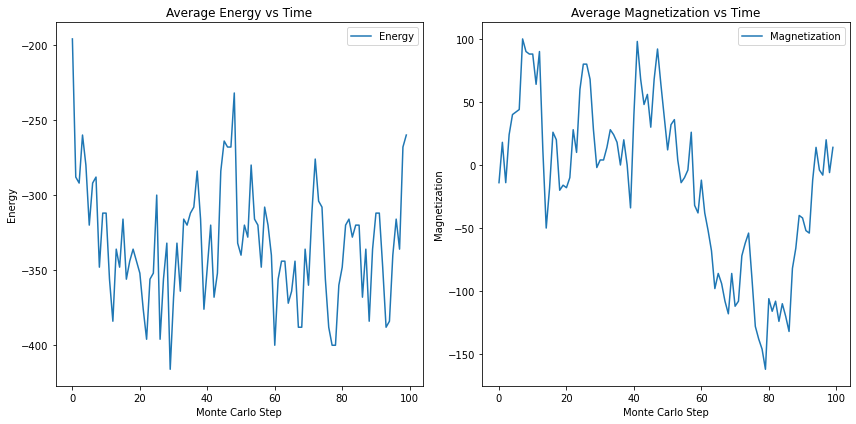

Final Magnetization at T = 3: 14


In [5]:
temperatures = [1, 2, 3]
for T in temperatures:
    print(f"Running simulation at T = {T}")
    final_magnetization = run_simulation(seed=42, T=T, steps=100)
    print(f"Final Magnetization at T = {T}: {final_magnetization}")
    #takes too long to run more steps

# T = 1: High spontaneous magnetization due to low thermal fluctuations.
# T = 2: Moderate magnetization as thermal energy starts to disrupt spin alignment.
# T = 3: Near-zero magnetization with high thermal energy causing random spin 
#orientations.
